In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [16]:
# Class names mapping as per CIFAR-10 documentation
class_map = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Convert to DataFrame and map class names
df = pd.DataFrame(y_train, columns=['label'])
df['class_name'] = df['label'].map(class_map)

# Show class distribution
print("CIFAR-10 Label Distribution with Class Names:")
print(df['class_name'].value_counts().sort_index())

# Or view in table format
print("\nLabel Numbers with Class Names:")
label_table = pd.DataFrame(list(class_map.items()), columns=['Label', 'Class Name'])
print(label_table)

CIFAR-10 Label Distribution with Class Names:
class_name
airplane      5000
automobile    5000
bird          5000
cat           5000
deer          5000
dog           5000
frog          5000
horse         5000
ship          5000
truck         5000
Name: count, dtype: int64

Label Numbers with Class Names:
   Label  Class Name
0      0    airplane
1      1  automobile
2      2        bird
3      3         cat
4      4        deer
5      5         dog
6      6        frog
7      7       horse
8      8        ship
9      9       truck


In [18]:
x_train, x_test = x_train/255.0 , x_test/255.0 # Normalize

In [20]:
# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [22]:
len(y_train)

50000

In [24]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [26]:
# Build a better CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.35),

        layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = create_model()

C:\Users\agraw\anaconda3\envs\tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# Callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_ckpt = callbacks.ModelCheckpoint("best1_cifar10_model.h5", save_best_only=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

In [36]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=5,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop, model_ckpt, lr_scheduler])

C:\Users\agraw\anaconda3\envs\tf\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.3090 - loss: 2.2233

782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 171ms/step - accuracy: 0.3091 - loss: 2.2228 - val_accuracy: 0.5181 - val_loss: 1.3302 - learning_rate: 0.0010
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.5213 - loss: 1.3260

782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 231ms/step - accuracy: 0.5213 - loss: 1.3259 - val_accuracy: 0.6084 - val_loss: 1.1064 - learning_rate: 0.0010
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.6068 - loss: 1.1052

782/782 ━━━━━━━━━━━━━━━━━━━━ 176s 225ms/step - accuracy: 0.6068 - loss: 1.1052 - val_accuracy: 0.6613 - val_loss: 0.9821 - learning_rate: 0.0010
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.6568 - loss: 0.9788

782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.6568 - loss: 0.9788 - val_accuracy: 0.6936 - val_loss: 0.8913 - learning_rate: 0.0010
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.6827 - loss: 0.9109

782/782 ━━━━━━━━━━━━━━━━━━━━ 113s 144ms/step - accuracy: 0.6827 - loss: 0.9108 - val_accuracy: 0.7161 - val_loss: 0.8287 - learning_rate: 0.0010


In [38]:
model.load_weights("best_cifar10_model.h5")
loss, acc = model.evaluate(x_test, y_test)
print(f"Best model accuracy on test set: {acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8331 - loss: 0.5003
Best model accuracy on test set: 0.8334


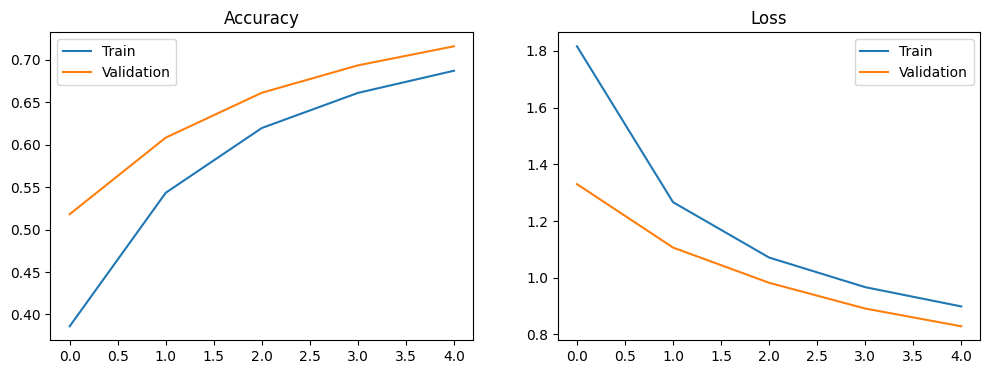

In [42]:
# ACCURACY
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()
 ## LOSS
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()


In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

preds = model.predict(x_test[:9])
pred_classes = np.argmax(preds, axis=1)

plt.figure(figsize=(10,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
